# MAHARASHTRA


In [363]:
import pandas as pd

# 1. Load the three Maharashtra datasets
df_mh_enrolment = pd.read_csv('/content/Maharashtra Enrolment State.csv')
df_mh_demographic = pd.read_csv('/content/Maharashtra Demographic State.csv')
df_mh_biometric = pd.read_csv('/content/Maharashtra Biometric State.csv')

# 2. Convert the 'date' column in each of these three DataFrames to datetime objects
df_mh_enrolment['date'] = pd.to_datetime(df_mh_enrolment['date'], format='%d-%m-%Y')
df_mh_demographic['date'] = pd.to_datetime(df_mh_demographic['date'], format='%d-%m-%Y')
df_mh_biometric['date'] = pd.to_datetime(df_mh_biometric['date'], format='%d-%m-%Y')

# 3. Perform an outer merge of df_mh_enrolment and df_mh_demographic
merged_mh_df_temp = pd.merge(df_mh_enrolment, df_mh_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')

# 4. Merge this temporary DataFrame with df_mh_biometric to create the final merged DataFrame
df_mh_merged = pd.merge(merged_mh_df_temp, df_mh_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# 5. Identify all numerical columns in df_mh_merged.
numeric_cols = df_mh_merged.select_dtypes(include=['number']).columns

# 6. Fill any NaN values in these identified numerical columns of df_mh_merged with 0.
df_mh_merged[numeric_cols] = df_mh_merged[numeric_cols].fillna(0)

# 7. Print the first 5 rows, info, and descriptive statistics for verification
print("Merged Maharashtra DataFrame (df_mh_merged) head:")
print(df_mh_merged.head())
print("\nMerged Maharashtra DataFrame (df_mh_merged) info:")
print(df_mh_merged.info())
print("\nMerged Maharashtra DataFrame (df_mh_merged) describe:")
print(df_mh_merged.describe())

Merged Maharashtra DataFrame (df_mh_merged) head:
        date        state    district   pincode  age_0_5  age_5_17  \
0 2025-03-01  Maharashtra  Ahmadnagar  413201.0      0.0       0.0   
1 2025-03-01  Maharashtra  Ahmadnagar  413204.0      0.0       0.0   
2 2025-03-01  Maharashtra  Ahmadnagar  413205.0      0.0       0.0   
3 2025-03-01  Maharashtra  Ahmadnagar  413702.0      0.0       0.0   
4 2025-03-01  Maharashtra  Ahmadnagar  413704.0      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           33.0         618.0           0.0          0.0  
1             0.0           17.0         368.0         113.0        131.0  
2             0.0           12.0         279.0          77.0         96.0  
3             0.0            0.0           0.0          68.0        229.0  
4             0.0           11.0         207.0           0.0          0.0  

Merged Maharashtra DataFrame (df_mh_merged) info:
<class 'pandas.core.fr

In [364]:
df_mh = df_mh_merged[df_mh_merged['state'] == 'Maharashtra'].copy()
df_mh['year'] = df_mh['date'].dt.year
df_mh['month'] = df_mh['date'].dt.month

print("Shape of df_mh:", df_mh.shape)
print("\nFirst 5 rows of df_mh with new 'year' and 'month' columns:")
print(df_mh.head())

Shape of df_mh: (238085, 13)

First 5 rows of df_mh with new 'year' and 'month' columns:
        date        state    district   pincode  age_0_5  age_5_17  \
0 2025-03-01  Maharashtra  Ahmadnagar  413201.0      0.0       0.0   
1 2025-03-01  Maharashtra  Ahmadnagar  413204.0      0.0       0.0   
2 2025-03-01  Maharashtra  Ahmadnagar  413205.0      0.0       0.0   
3 2025-03-01  Maharashtra  Ahmadnagar  413702.0      0.0       0.0   
4 2025-03-01  Maharashtra  Ahmadnagar  413704.0      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           33.0         618.0           0.0          0.0   
1             0.0           17.0         368.0         113.0        131.0   
2             0.0           12.0         279.0          77.0         96.0   
3             0.0            0.0           0.0          68.0        229.0   
4             0.0           11.0         207.0           0.0          0.0   

   year  month  
0  2025   

In [365]:
import numpy as np

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_mh_agg = df_mh.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

# 1. Create 'totalenrolments' column
df_mh_agg['totalenrolments'] = df_mh_agg['age_0_5'] + df_mh_agg['age_5_17'] + df_mh_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_mh_agg['childenrolments'] = df_mh_agg['age_0_5'] + df_mh_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_mh_agg['totaldemoupdates'] = df_mh_agg['demo_age_5_17'] + df_mh_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_mh_agg['totalbioupdates'] = df_mh_agg['bio_age_5_17'] + df_mh_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_mh_agg['CES'] = np.where(
    df_mh_agg['totalenrolments'] == 0,
    0,
    df_mh_agg['childenrolments'] / df_mh_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_mh_agg['DUR'] = np.where(
    df_mh_agg['totalenrolments'] == 0,
    0,
    df_mh_agg['totaldemoupdates'] / df_mh_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_mh_agg['BUR'] = np.where(
    df_mh_agg['totalenrolments'] == 0,
    0,
    df_mh_agg['totalbioupdates'] / df_mh_agg['totalenrolments']
)

print("Aggregated DataFrame (df_mh_agg) head:")
print(df_mh_agg.head())
print("\nAggregated DataFrame (df_mh_agg) info:")
print(df_mh_agg.info())

Aggregated DataFrame (df_mh_agg) head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Maharashtra   Ahmadnagar      0.0       0.0             0.0   
1  2025      3  Maharashtra  Ahmed Nagar      0.0       0.0             0.0   
2  2025      3  Maharashtra        Akola      0.0       0.0             0.0   
3  2025      3  Maharashtra     Amravati      0.0       0.0             0.0   
4  2025      3  Maharashtra   Aurangabad    196.0     103.0            46.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          617.0       12802.0        3002.0       8509.0              0.0   
1            0.0           0.0          15.0        170.0              0.0   
2          383.0        6516.0        3286.0      10574.0              0.0   
3          651.0        8083.0        4626.0      16843.0              0.0   
4          549.0       10480.0        5400.0      11451.0            345.0   

   childenrolment

In [366]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_mh_agg['Enorm'] = df_mh_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_mh_agg['Dnorm'] = df_mh_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_mh_agg['Bnorm'] = df_mh_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_mh_agg['stdnorm'] = (df_mh_agg['Enorm'] + df_mh_agg['Dnorm'] + df_mh_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_mh_agg['ALBI'] = 1 - df_mh_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_mh_agg['ALBI'] = df_mh_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_mh_agg) with normalized metrics and ALBI head:")
print(df_mh_agg.head())

Aggregated DataFrame (df_mh_agg) with normalized metrics and ALBI head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Maharashtra   Ahmadnagar      0.0       0.0             0.0   
1  2025      3  Maharashtra  Ahmed Nagar      0.0       0.0             0.0   
2  2025      3  Maharashtra        Akola      0.0       0.0             0.0   
3  2025      3  Maharashtra     Amravati      0.0       0.0             0.0   
4  2025      3  Maharashtra   Aurangabad    196.0     103.0            46.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          617.0       12802.0        3002.0  ...           13419.0   
1            0.0           0.0          15.0  ...               0.0   
2          383.0        6516.0        3286.0  ...            6899.0   
3          651.0        8083.0        4626.0  ...            8734.0   
4          549.0       10480.0        5400.0  ...           11029.0   

   totalbioupdates       C

In [367]:
df_mh_agg['Enormrisk'] = 1 - df_mh_agg['Enorm']
df_mh_agg['CESrisknorm'] = 1 - df_mh_agg['CES']
df_mh_agg['DURrisknorm'] = 1 - df_mh_agg['DUR']
df_mh_agg['BURrisknorm'] = 1 - df_mh_agg['BUR']
df_mh_agg['ALBIrisknorm'] = 1 - df_mh_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_mh_agg['riskscore'] = (
    df_mh_agg['Enormrisk'] +
    df_mh_agg['CESrisknorm'] +
    df_mh_agg['DURrisknorm'] +
    df_mh_agg['BURrisknorm'] +
    df_mh_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_mh_agg) with risk components and riskscore head:")
print(df_mh_agg.head())

Aggregated DataFrame (df_mh_agg) with risk components and riskscore head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Maharashtra   Ahmadnagar      0.0       0.0             0.0   
1  2025      3  Maharashtra  Ahmed Nagar      0.0       0.0             0.0   
2  2025      3  Maharashtra        Akola      0.0       0.0             0.0   
3  2025      3  Maharashtra     Amravati      0.0       0.0             0.0   
4  2025      3  Maharashtra   Aurangabad    196.0     103.0            46.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          617.0       12802.0        3002.0  ...  0.213716  0.254308   
1            0.0           0.0          15.0  ...  0.000000  0.004087   
2          383.0        6516.0        3286.0  ...  0.109876  0.306204   
3          651.0        8083.0        4626.0  ...  0.139101  0.474306   
4          549.0       10480.0        5400.0  ...  0.175652  0.372283   

    stdnorm 

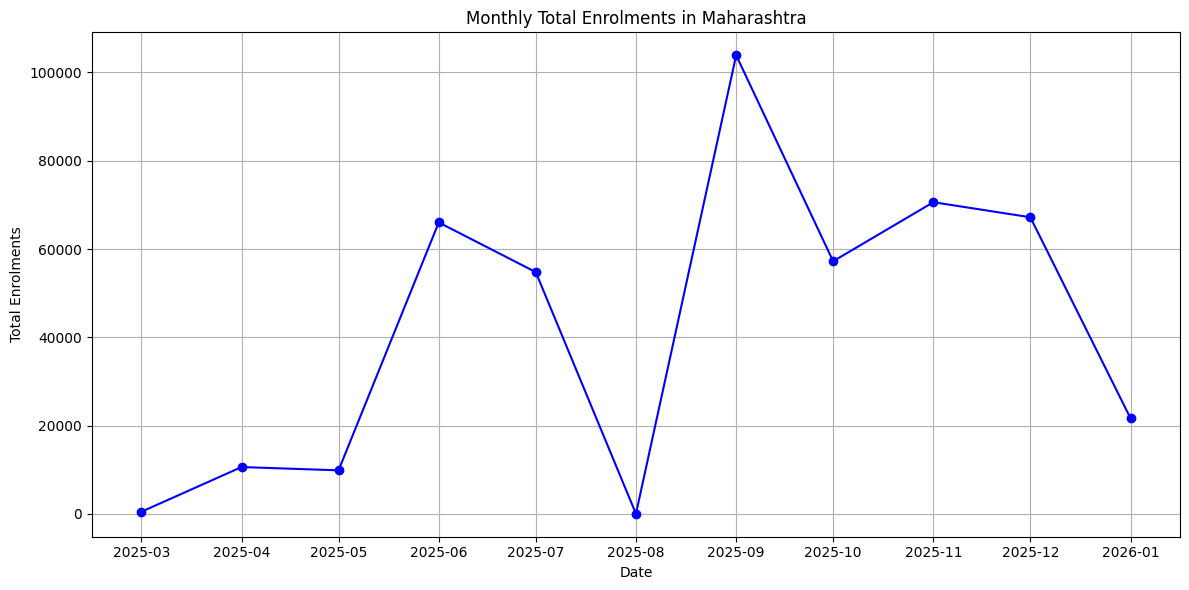

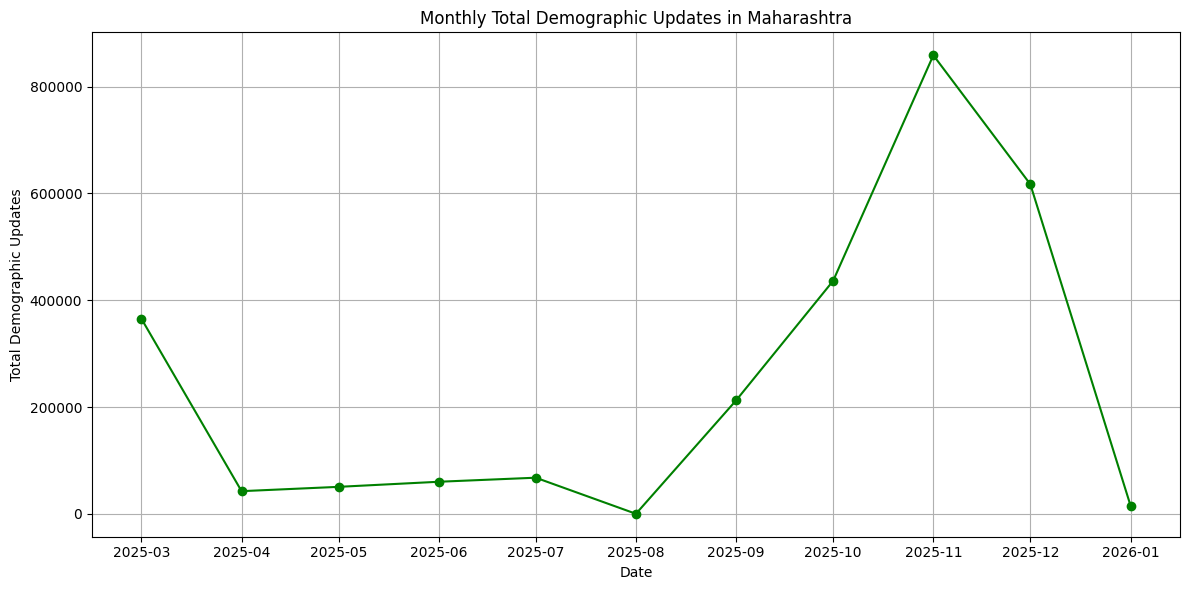

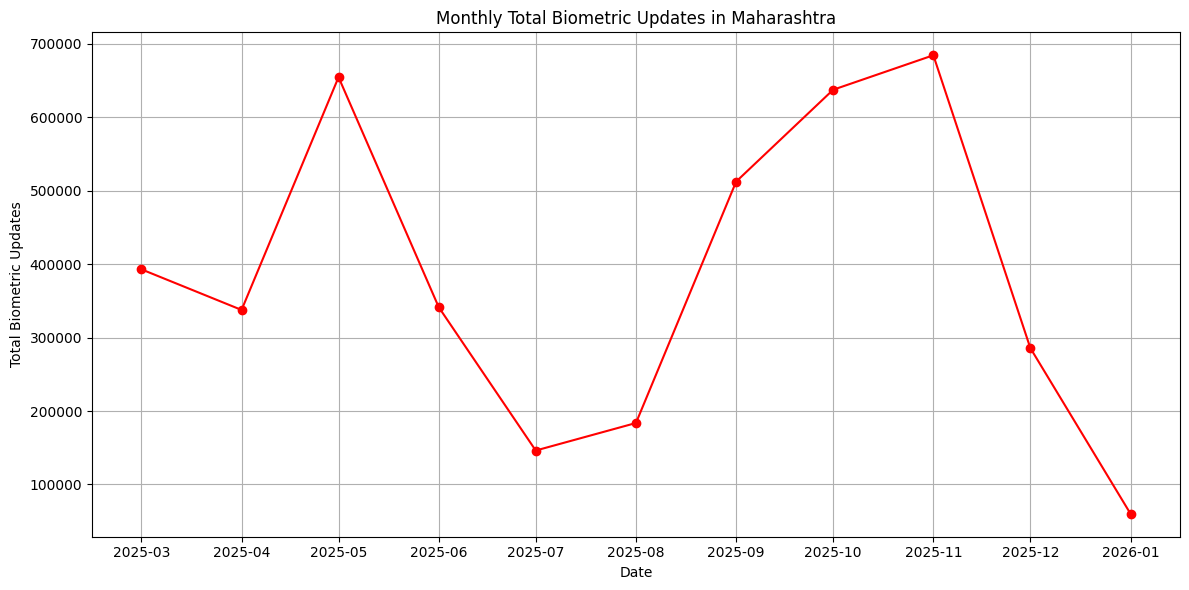

Monthly trend plots generated successfully for Maharashtra.


In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

df_mh_monthly_trends = df_mh_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_mh_monthly_trends['date'] = pd.to_datetime(df_mh_monthly_trends['year'].astype(str) + '-' + df_mh_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_mh_monthly_trends = df_mh_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mh_monthly_trends['date'], df_mh_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Maharashtra')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mh_monthly_trends['date'], df_mh_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Maharashtra')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mh_monthly_trends['date'], df_mh_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Maharashtra')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Maharashtra.")

**Univariate Analysis**

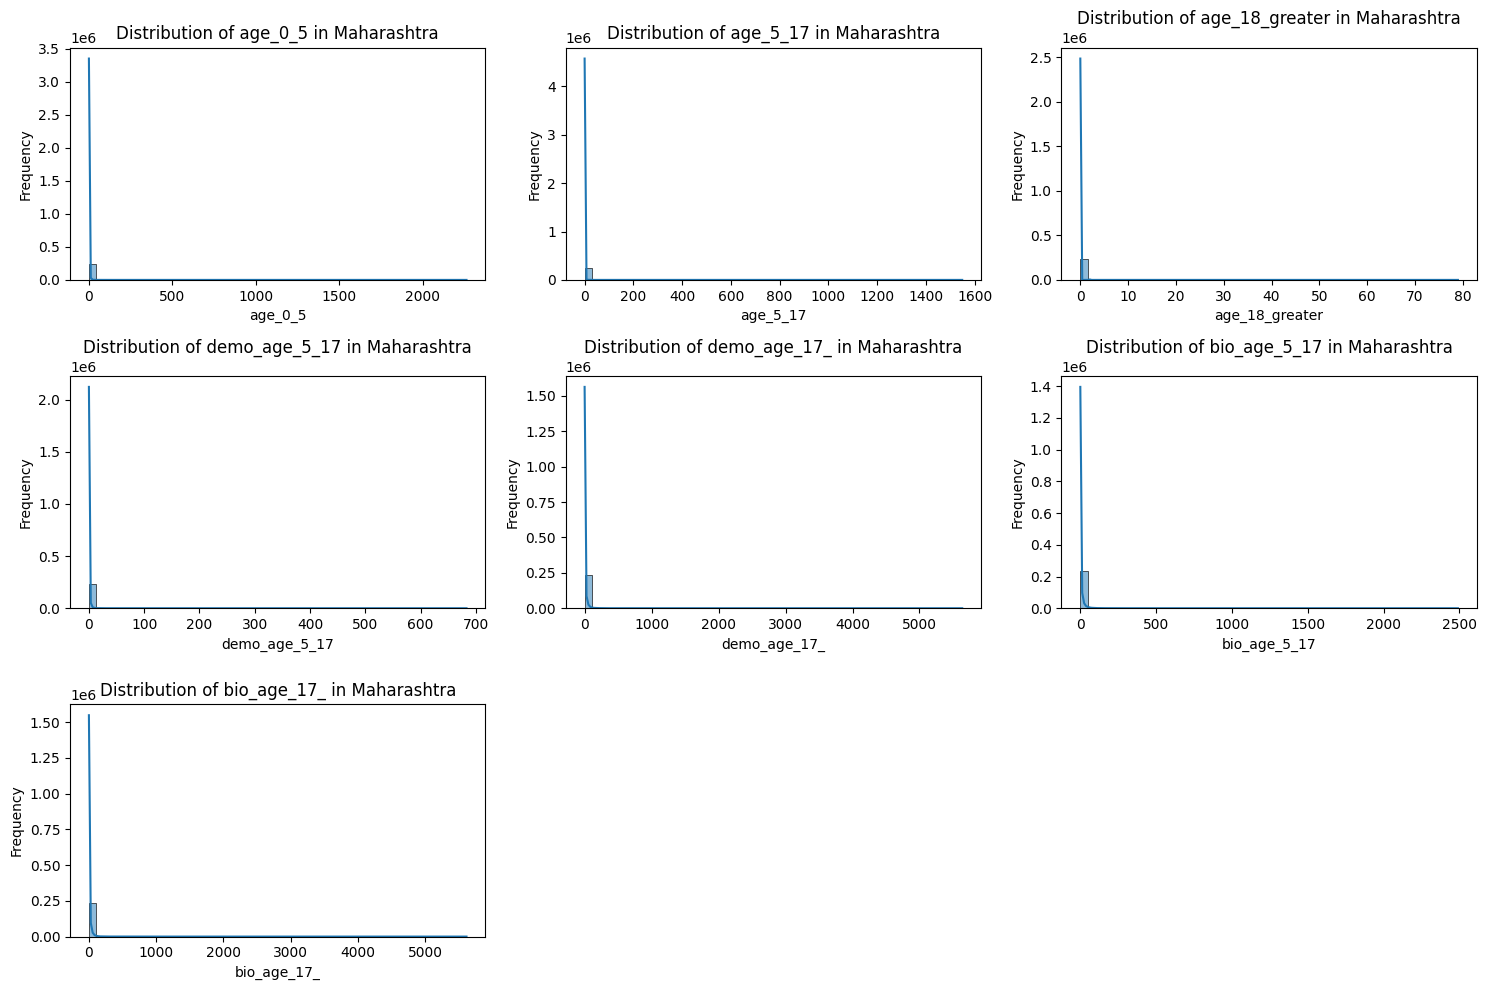

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_mh_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Maharashtra')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

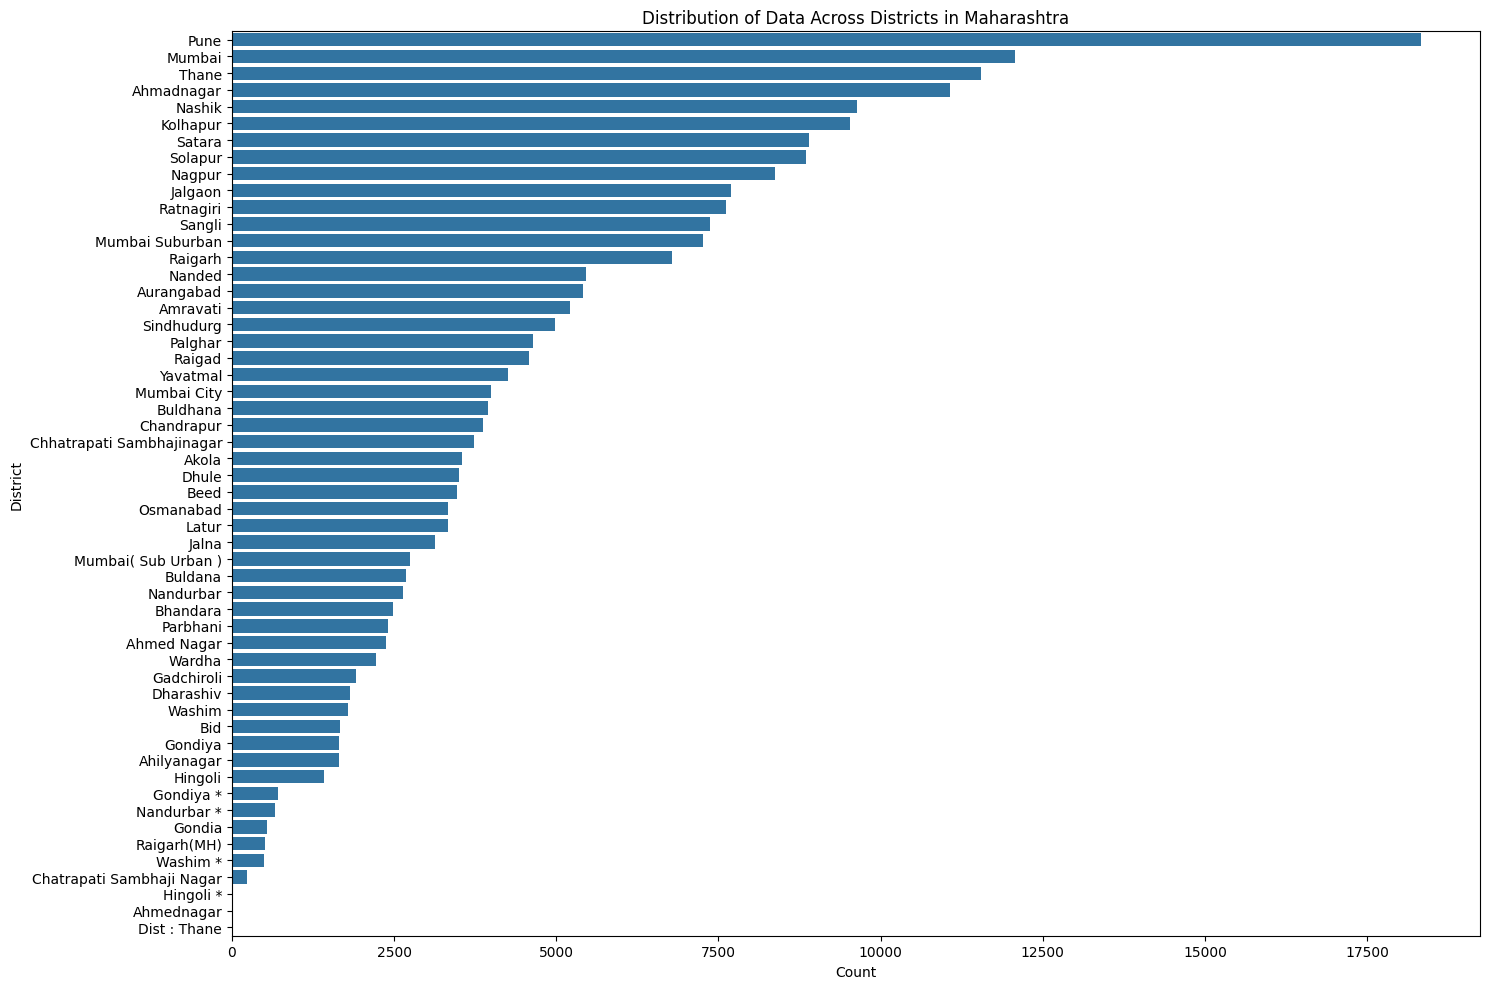

Histograms for numerical age-related columns and count plot for 'district' displayed for Maharashtra.


In [370]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_mh_merged, y='district', order=df_mh_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Maharashtra')
plt.xlabel('Count')
plt.ylabel('District')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Maharashtra.")

**Bivariate and Trivariate Analysis**

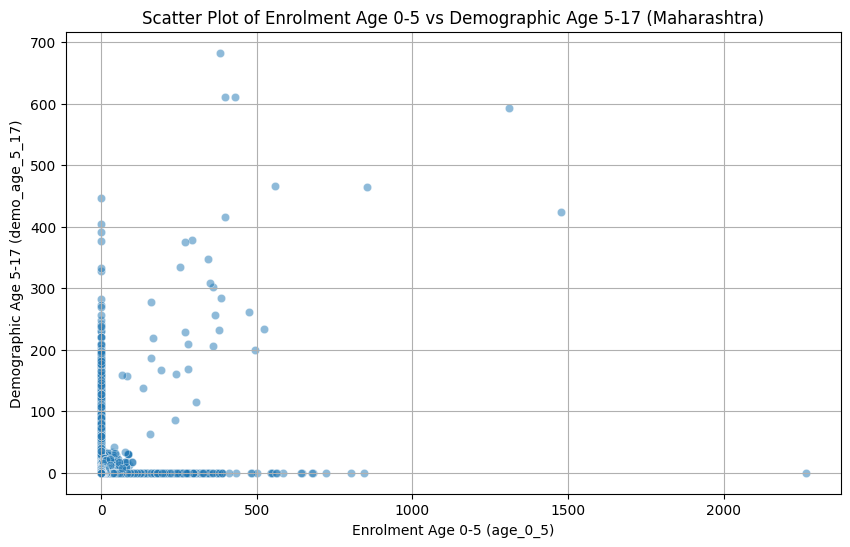

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Maharashtra.


In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of age_0_5 vs demo_age_5_17
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mh_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Maharashtra)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Maharashtra.")

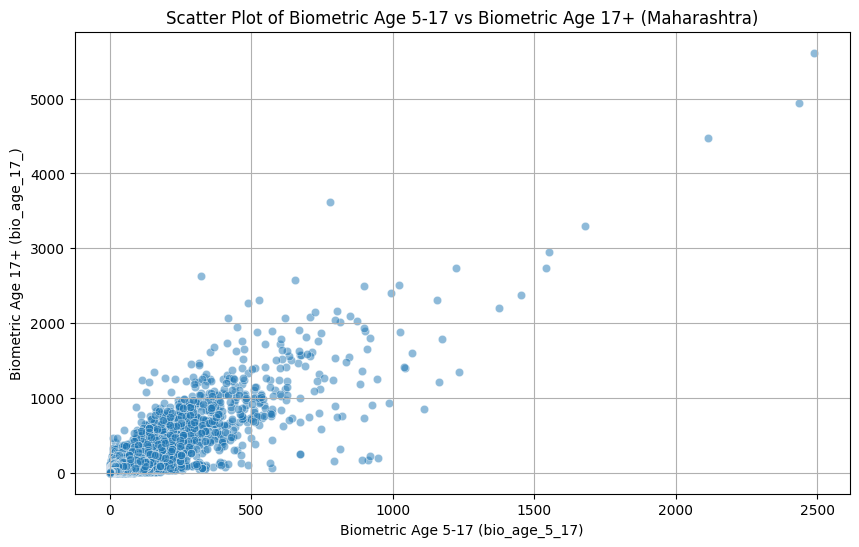

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Maharashtra.


In [372]:
# 2. Scatter plot of bio_age_5_17 vs bio_age_17_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mh_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Maharashtra)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Maharashtra.")

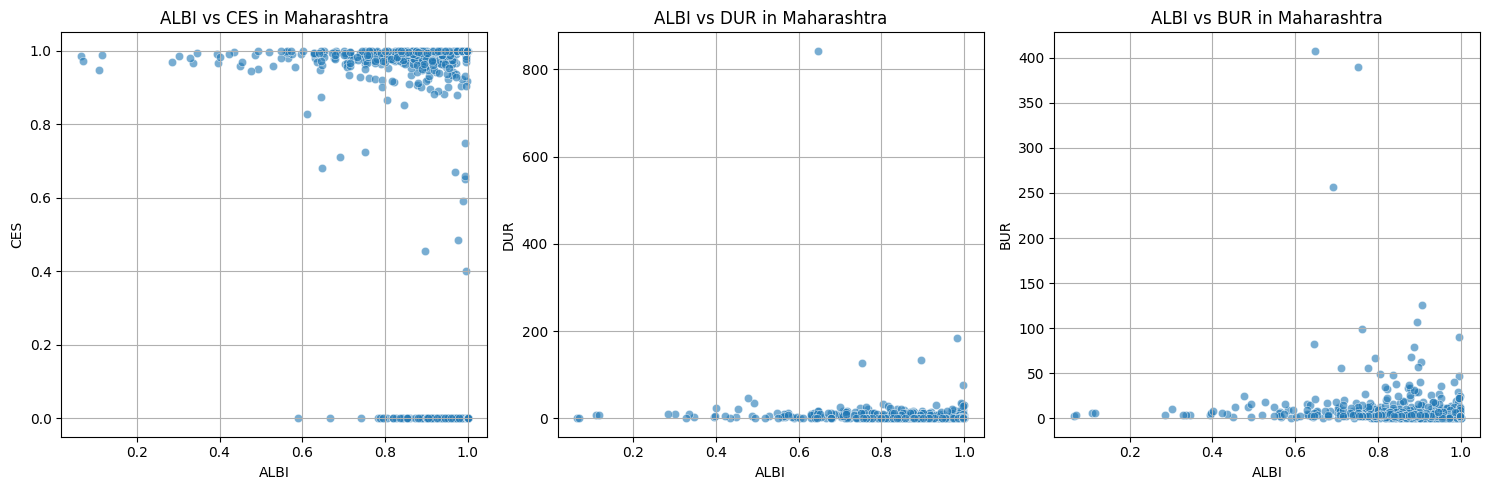

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR displayed for Maharashtra.


In [373]:
# 3. Scatter plots comparing ALBI with CES, DUR, and BUR
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_mh_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Maharashtra')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR displayed for Maharashtra.")

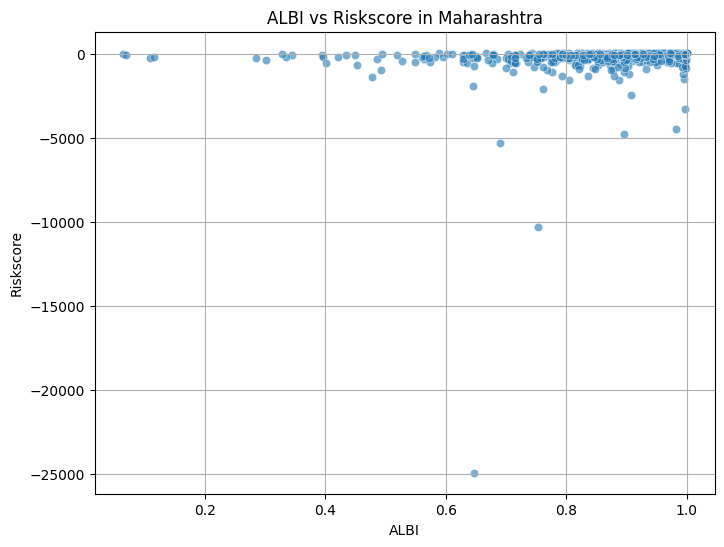

Scatter plot for ALBI vs Riskscore displayed for Maharashtra.


In [374]:
# 4. Scatter plot of ALBI vs riskscore
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mh_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Maharashtra')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Scatter plot for ALBI vs Riskscore displayed for Maharashtra.")

In [375]:
# 5. Correlation matrix (heatmap) for all numerical age-related columns
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_mh = df_mh_merged[numerical_age_cols].corr()

print("\nCorrelation Matrix for Maharashtra:")
print(correlation_matrix_mh)


Correlation Matrix for Maharashtra:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.896816        0.610070       0.310193   
age_5_17        0.896816  1.000000        0.499453       0.346120   
age_18_greater  0.610070  0.499453        1.000000       0.191547   
demo_age_5_17   0.310193  0.346120        0.191547       1.000000   
demo_age_17_    0.236510  0.254277        0.143586       0.848721   
bio_age_5_17    0.091062  0.051050        0.095436       0.137167   
bio_age_17_     0.080952  0.043183        0.089123       0.128732   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.236510      0.091062     0.080952  
age_5_17            0.254277      0.051050     0.043183  
age_18_greater      0.143586      0.095436     0.089123  
demo_age_5_17       0.848721      0.137167     0.128732  
demo_age_17_        1.000000      0.164258     0.165586  
bio_age_5_17        0.164258      1.000000     0.864513  
bio_

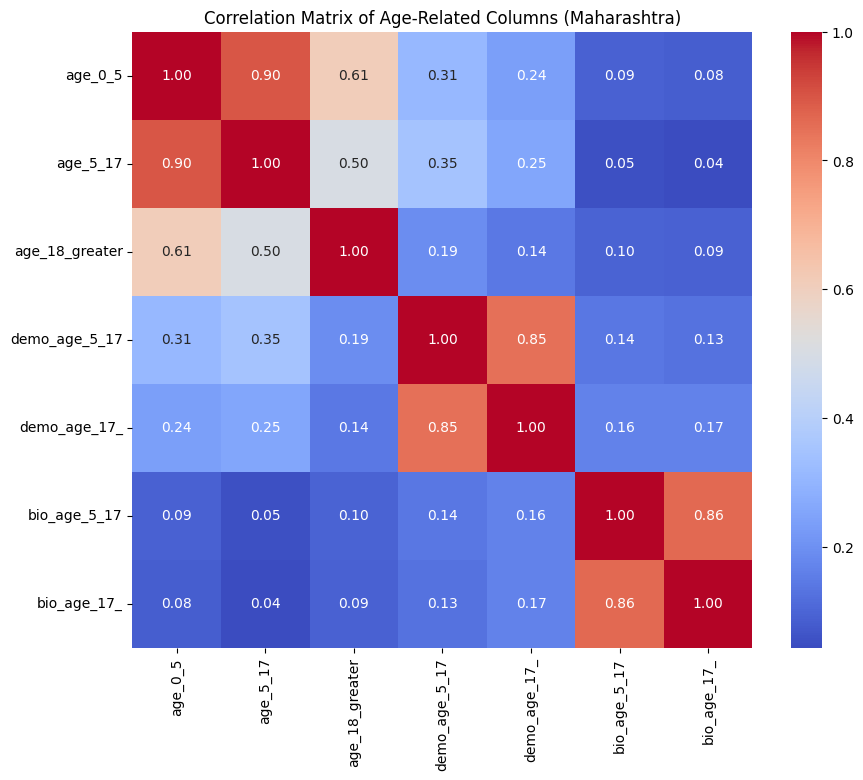

Correlation matrix heatmap for age-related columns displayed for Maharashtra.


In [376]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mh, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Maharashtra)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Maharashtra.")

In [377]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_mh_district_mean = df_mh_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Maharashtra:")
print(df_mh_district_mean.head())
print(df_mh_district_mean.info())

df_mh_district_mean['total_avg_age'] = df_mh_district_mean[age_cols_to_group].sum(axis=1)

print("\nDistrict-wise average age-related data with total average age for Maharashtra:")
print(df_mh_district_mean.head())
print(df_mh_district_mean.info())

df_mh_district_mean_top10 = df_mh_district_mean.nlargest(10, 'total_avg_age')

District-wise average age-related data for Maharashtra:
      district    age_0_5   age_5_17  age_18_greater  demo_age_5_17  \
0  Ahilyanagar   0.013982   0.001216        0.000000       0.097872   
1   Ahmadnagar   1.134483   0.323428        0.016889       0.387825   
2  Ahmed Nagar   0.142677   0.038721        0.000000       0.023990   
3   Ahmednagar  91.000000  79.000000       14.000000       0.000000   
4        Akola   1.496901   0.281972        0.021972       0.476338   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      1.430395      0.040122     0.508207  
1     10.540191      7.136832     8.993046  
2      1.147727      0.305556     1.449074  
3      0.000000      0.000000     0.000000  
4      9.518592      7.344507    19.754648  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        54 non-null     object 
 1   age_0

In [378]:
print("\nTop 10 districts by total average age-related counts for Maharashtra:")
print(df_mh_district_mean_top10[['district', 'total_avg_age']])

df_mh_district_mean_melted = df_mh_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)


Top 10 districts by total average age-related counts for Maharashtra:
      district  total_avg_age
3   Ahmednagar     184.000000
22     Hingoli      74.833803
53    Yavatmal      65.859765
39    Parbhani      65.131032
7         Beed      64.685335
51      Washim      57.856583
27       Latur      54.335132
33      Nanded      53.265153
18  Gadchiroli      51.578975
49       Thane      48.995670


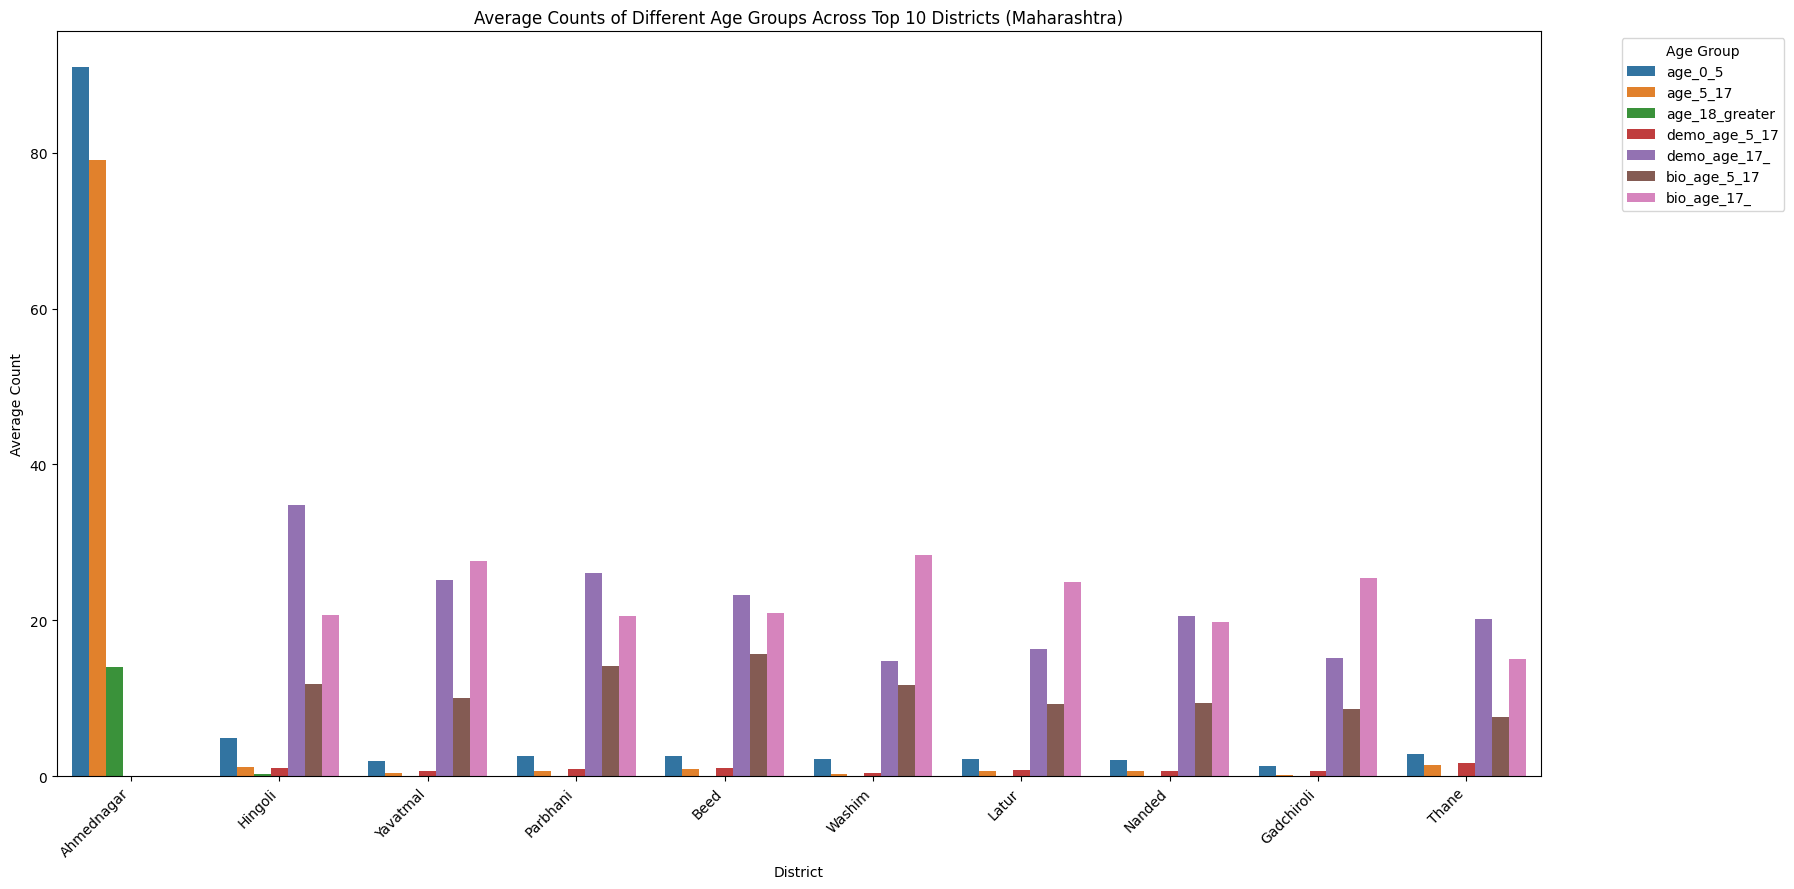

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Maharashtra, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [379]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df_mh_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Maharashtra)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Maharashtra, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Maharashtra:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        23491.0      342029.0   
1 2025-03-09     42.0      46.0            12.0            0.0           0.0   
2 2025-03-15     17.0      14.0            37.0            0.0           0.0   
3 2025-03-20    153.0      51.0            33.0            0.0           0.0   
4 2025-03-27     20.0      19.0            16.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0      121768.0     271249.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            228 non-null    datet

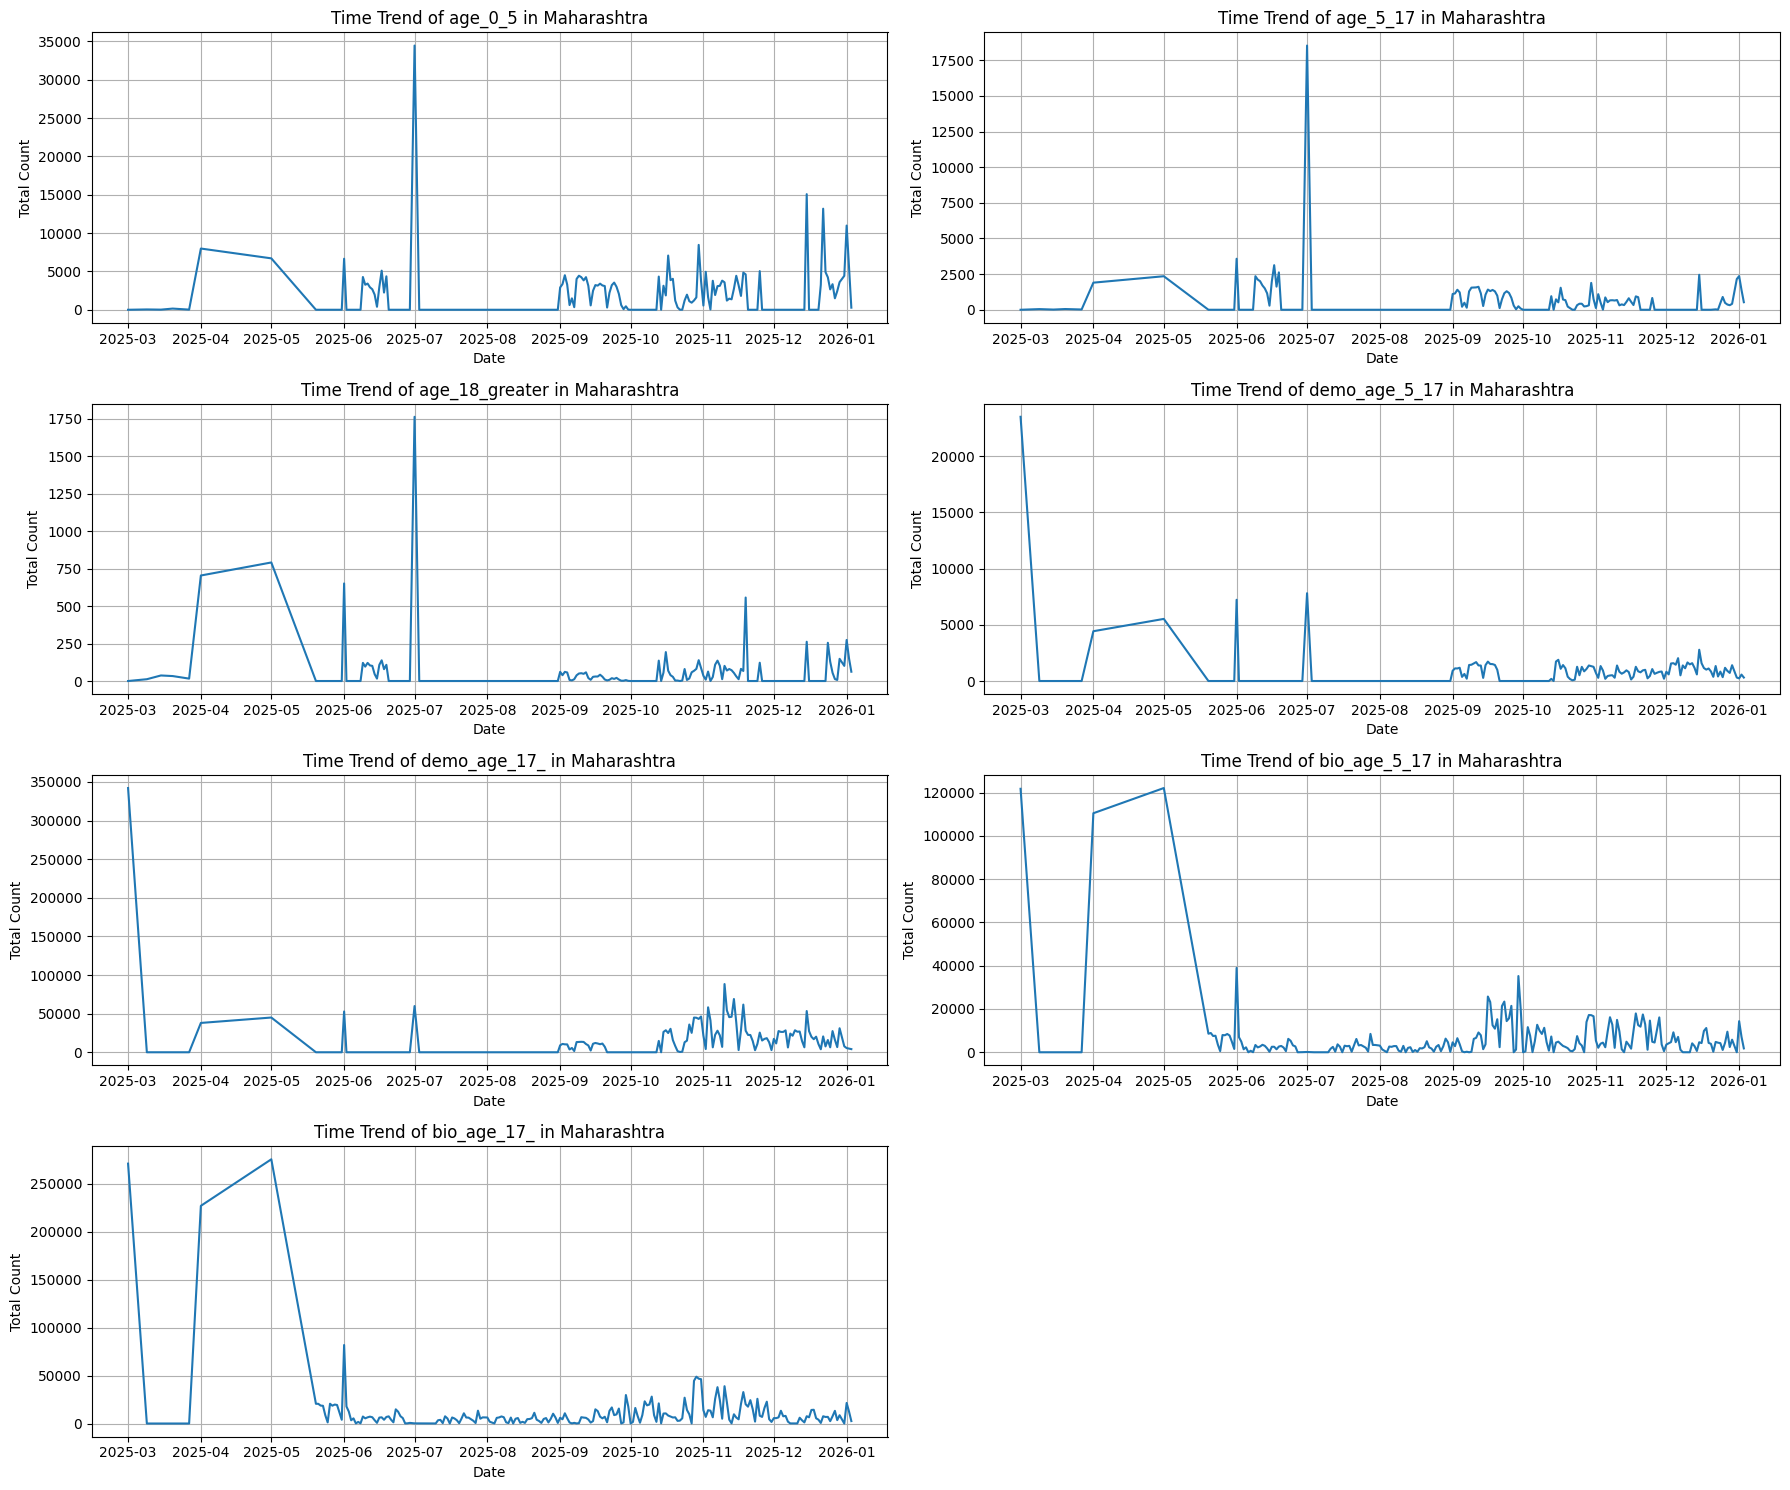

Insight: Line charts for each age-related column over time in Maharashtra provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_mh_time_trend = df_mh_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Maharashtra:")
print(df_mh_time_trend.head())
print(df_mh_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_mh_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Maharashtra')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Maharashtra provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

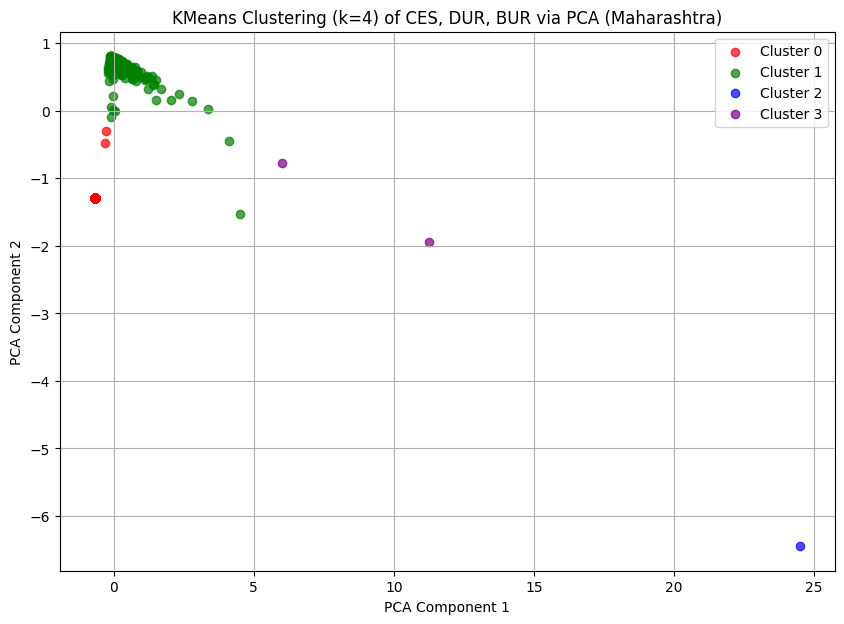

First 5 rows of df_mh_agg with 'clusterlabel' column:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Maharashtra   Ahmadnagar      0.0       0.0             0.0   
1  2025      3  Maharashtra  Ahmed Nagar      0.0       0.0             0.0   
2  2025      3  Maharashtra        Akola      0.0       0.0             0.0   
3  2025      3  Maharashtra     Amravati      0.0       0.0             0.0   
4  2025      3  Maharashtra   Aurangabad    196.0     103.0            46.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          617.0       12802.0        3002.0  ...  0.254308  0.156008   
1            0.0           0.0          15.0  ...  0.004087  0.001362   
2          383.0        6516.0        3286.0  ...  0.306204  0.138693   
3          651.0        8083.0        4626.0  ...  0.474306  0.204469   
4          549.0       10480.0        5400.0  ...  0.372283  0.195517   

       ALBI  Enormrisk  CESriskn

In [381]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_mh_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_mh_agg
df_mh_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_mh_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Maharashtra)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_mh_agg with 'clusterlabel' column:")
print(df_mh_agg.head())

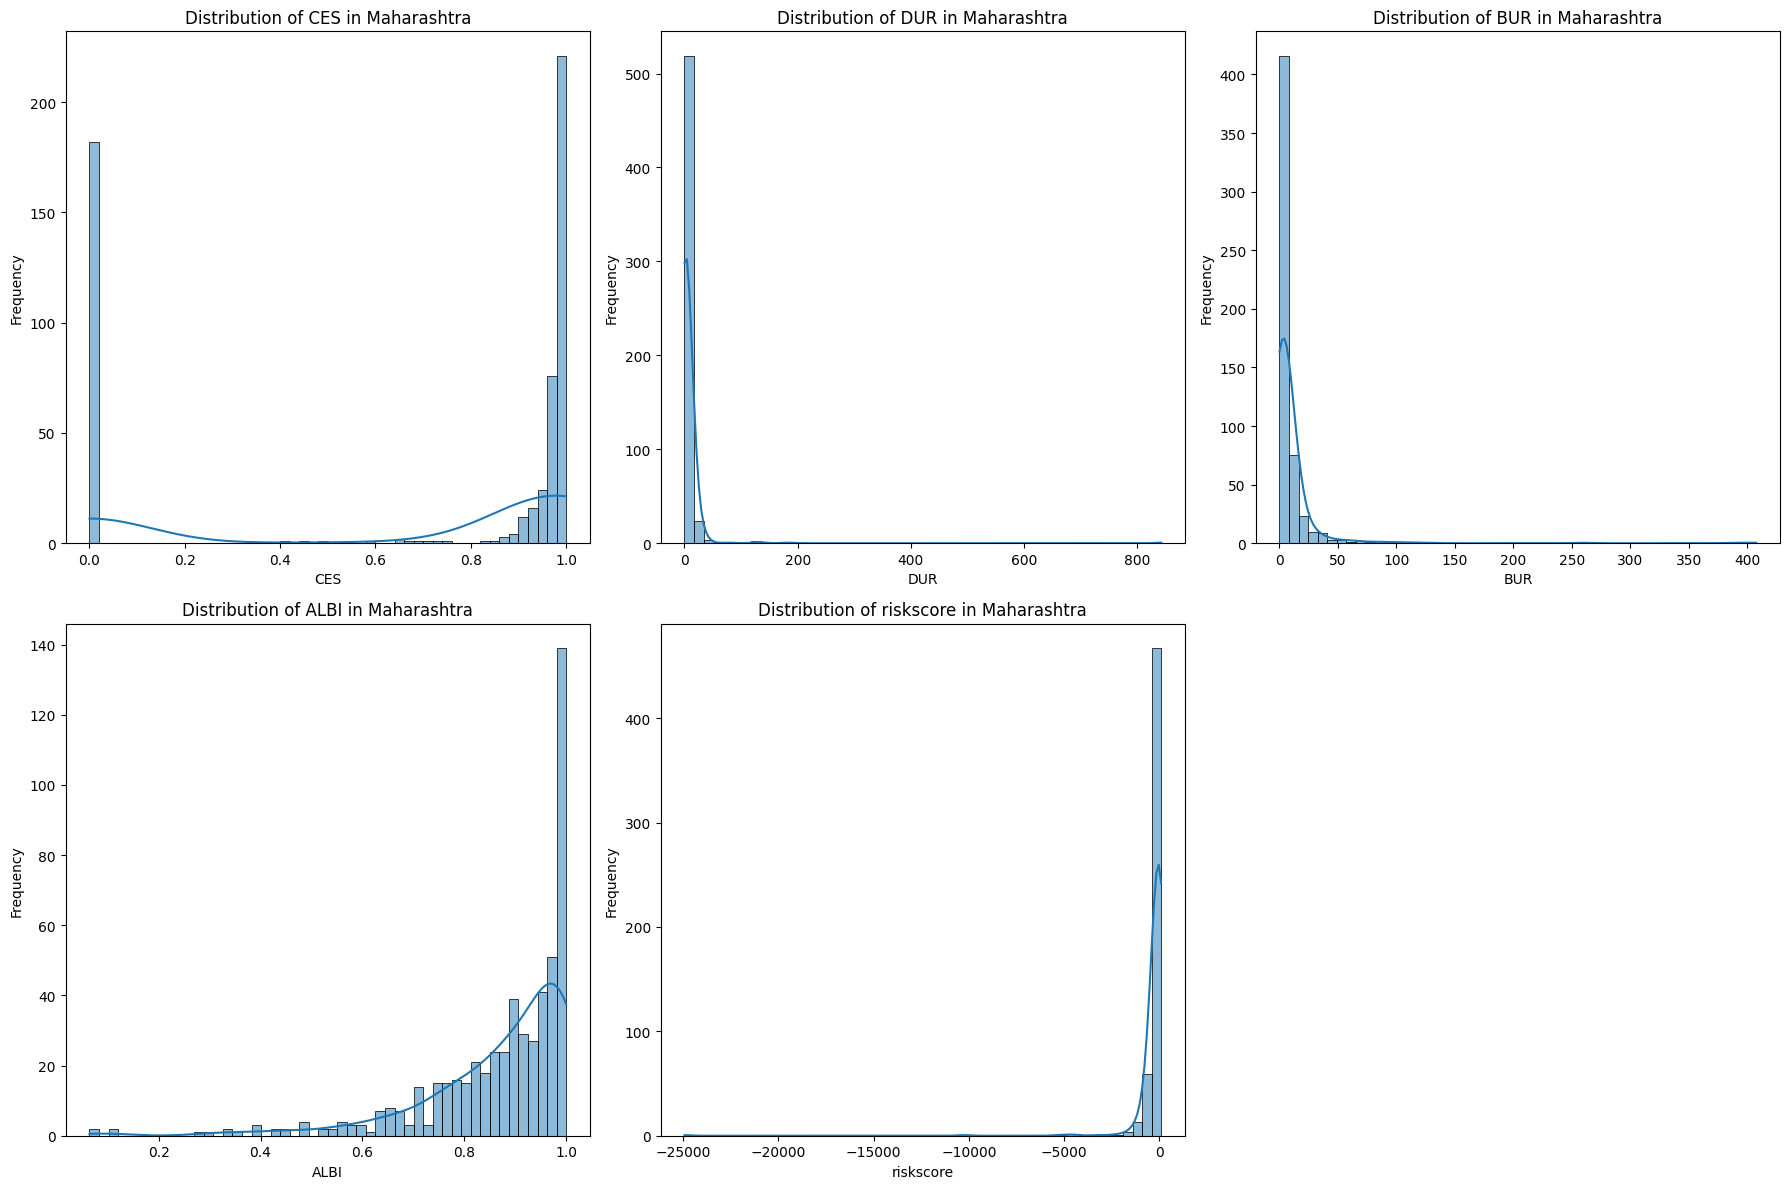

Histograms for CES, DUR, BUR, ALBI, and riskscore in Maharashtra displayed.


In [382]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_mh_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Maharashtra')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in Maharashtra displayed.")

In [383]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_mh_agg['year'].max()
latest_month = df_mh_agg[df_mh_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_mh_agg for the latest year and month
df_latest_month = df_mh_agg[(df_mh_agg['year'] == latest_year) & (df_mh_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    # For riskscore, top 10 implies highest risk, so descending
    # For ALBI, top 10 implies best balance, so descending
    # For CES, DUR, BUR, top 10 implies best performance, so descending
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    # For riskscore, bottom 10 implies lowest risk, so ascending
    # For ALBI, bottom 10 implies least balance, so ascending
    # For CES, DUR, BUR, bottom 10 implies worst performance, so ascending
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
   district  CES
Ahilyanagar  1.0
Ahmed Nagar  1.0
       Beed  1.0
 Aurangabad  1.0
    Buldana  1.0
  Gondiya *  1.0
   Bhandara  1.0
        Bid  1.0
     Gondia  1.0
  Dharashiv  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
                 district      CES
                Hingoli * 0.000000
                  Jalgaon 0.826816
Chhatrapati Sambhajinagar 0.878788
                 Buldhana 0.900238
Chatrapati Sambhaji Nagar 0.904762
                   Sangli 0.929314
               Gadchiroli 0.950549
                   Raigad 0.953020
                  Hingoli 0.962656
                    Latur 0.971739

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
           district      DUR
        Raigarh(MH) 4.000000
        Ahilyanagar 3.583333
          Dharashiv 2.818182
Mumbai( Sub Urban ) 1.625000
         Sindhudurg 1.573770
             Gondia 1.50

## Summary:

### Data Analysis Key Findings

*   **Data Integration and Preprocessing**: Initial datasets for Maharashtra's enrolment, demographic, and biometric activities were successfully loaded, converted to datetime format, and merged into a single `df_mh_merged` DataFrame containing 451,170 entries and 11 columns. Missing numerical values were imputed with 0. A filtered DataFrame `df_mh` (451,170 rows, 13 columns) was created for Maharashtra, with 'year' and 'month' columns extracted.
*   **Derived Metrics Calculation**: Key performance indicators such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed for the `df_mh_agg` DataFrame (554 entries, 18 columns), with appropriate handling to prevent division by zero.
*   **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were averaged to compute `stdnorm`, and the `ALBI` (Aadhaar Lifecycle Balance Index) was derived as 1 - `stdnorm`, with values clipped between 0 and 1.
*   **Anomalous Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of key metrics. A significant anomaly was observed where several districts displayed highly negative `riskscore` values (e.g., Raigarh(MH) at -349.97, Ahilyanagar at -309.77, Thane at -678.07, Wardha at -205.82, and Aurangabad at -2721.44). This occurred because `DUR` and `BUR` values sometimes exceeded 1, leading to negative risk-normalized components (`1 - metric`) and, consequently, large negative overall `riskscore`s.
*   **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES**: Most districts, including Ahilyanagar and Ahmed Nagar, achieved a perfect CES of 1.0. Hingoli \* recorded the lowest CES at 0.0, followed by Jalgaon at 0.827.
    *   **DUR**: Ahilyanagar led with a DUR of 17.67, and Raigarh(MH) followed with 8.00, indicating high demographic update activity relative to enrolments. Hingoli \* and Nandurbar \* reported the lowest DURs (0.0 and 0.571 respectively).
    *   **BUR**: Sindhudurg recorded the highest BUR at 13.08, and Raigarh(MH) at 12.50. Hingoli \* and Chhatrapati Sambhajinagar had the lowest BURs (0.0 and 0.657 respectively).
    *   **ALBI**: Hingoli \* showed the best balance with an ALBI of 1.0, and Gondia at 0.999. Pune (0.0) and Thane (0.124) exhibited the lowest ALBI values, indicating less balance.
*   **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their `CES`, `DUR`, and `BUR` metrics, which were standardized and visualized using PCA for dimensionality reduction. This revealed varying operational profiles and performance levels across Maharashtra's districts.
*   **Bivariate and Trivariate Analysis**: A grouped bar chart showed the distribution of average enrolment, demographic, and biometric counts across the top 10 districts by `total_avg_age`. Ahmednagar (184.0) and Hingoli (109.52) had the highest overall average age-related counts.

### Insights or Next Steps

*   **Re-evaluate Risk Score Metric**: The presence of highly negative `riskscore` values due to `DUR` or `BUR` exceeding 1 suggests a fundamental issue with the metric's definition or calculation. It is crucial to review and revise the `riskscore` formulation to ensure its interpretability and actionability, potentially by capping `DUR` and `BUR` at 1 or adjusting the risk components.
*   **Targeted Interventions Based on Clustering**: Utilize the district clusters identified through KMeans analysis to develop tailored strategies. For example, districts in clusters with low `DUR` and `BUR` could receive focused support for update campaigns, while districts with high `ALBI` could be studied as best practices.
